<a href="https://colab.research.google.com/github/akalgreadis/deep-learning-playground/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning Sentiment Analysis

In this hands-on exercise we are going to learn to use Recurrent Neural Network (RNN) to perform sentiment analysis on movie reviews. 

The tools we are going to use for this exericse are :

* **Tensorflow** - an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.


* **Keras** - a heavyweight wrapper for Tensorflow. It’s minimalistic, modular, and awesome for rapid experimentation. This is our favorite Python library for deep learning and the best place to start for beginners.


* **Google CoLab** - an implementation of the widely used open-source Jupyter Notebook that has most popular libraries used for machine learning already preinstalled. Its a perfect tool for rapid prototyping and experimentation.


# Step 1 - Import libraries and modules

In [0]:
import pandas as pd
import numpy 
import keras
from keras.datasets import imdb 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers import Flatten 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from time import time
from numpy import array

#Step 2 - Import the IMDB dataset 

As a first step, will load the IMDB dataset, which is already part of the Keras datasets.

The dataset consists of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [2]:
from keras.datasets import imdb 
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
word_to_id = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


## Print movie review example 

Let's print an example of a movie review from the dataset.

Note that we only loaded the 5000 most common words from the dataset, therefore there might appear words as < UNKNOWN >.

In [3]:
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNKOWN>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[0] ))

print('sentiment = ', y_train[0] )

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNKOWN> is an amazing actor and now the same being director <UNKOWN> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNKOWN> and would recommend it to everyone to watch and the fly <UNKOWN> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNKOWN> to the two little <UNKOWN> that played the <UNKOWN> of norman and paul they were just brilliant children are often left out of the <UNKOWN> list i think because the stars that play them all grown up are such a big <UNKOWN> for the whole film but these children are amazing and sh

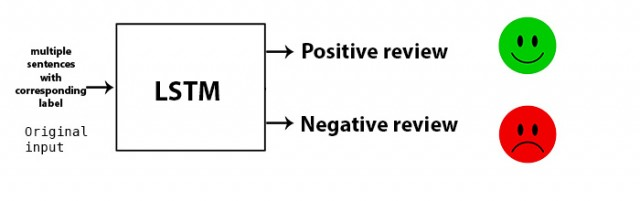

In [4]:
from IPython.display import Image
Image('https://preview.ibb.co/bC0Kfq/sentiment-Analysis-Workshop.jpg')

![img](https://drive.google.com/file/d/1kN0yHrzQoddyZLZSoLVa5HnCn-fI_QIA/view) 

# Step 3 - Preprocess input data
Not all reviews contain the same number of words, we will truncate the reviews in both the training and test datasets to a maximum number of words of 500.

In [5]:
# Truncate and pad the review sequences
from keras.preprocessing import sequence 
max_review_length = 500 
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length) 
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length) 
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


##Print Data sample

If you run the cell below, we will print the first reviews.

If you look at the data you will realize it has been already pre-processed. All words have been mapped to integers and the integers represent the words sorted by their frequency. This is very common in text analysis to represent a dataset like this. So 4 represents the 4th most used word, 5 the 5th most used word and so on

In [6]:
# Print the first reviews.
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,4472,113,103,32,15,16,2,19,178,32
1,0,0,0,0,0,0,0,0,0,0,...,52,154,462,33,89,78,285,16,145,95
2,0,0,0,0,0,0,0,0,0,0,...,106,607,624,35,534,6,227,7,129,113
3,687,23,4,2,2,6,3693,42,38,39,...,26,49,2,15,566,30,579,21,64,2574
4,0,0,0,0,0,0,0,0,0,0,...,19,14,5,2,6,226,251,7,61,113


# Step 4 - Design model architecture

The next step is to create the model that will be trained. We will use the Keras Sequential model, which is a linear stack of layers. For more information see https://keras.io/getting-started/sequential-model-guide/.

The first layer is an embedding layer. TODO: add explanation.

The second layer is a Long Short Term Memory (LSTM) layer, which is a type of recurrent layer.

The third layer is a fully connected layer.


In [42]:
embedding_vector_length = 32  #@param {type:"slider", min:16, max:64, step:16}
number_recurrents = 10  #@param {type:"slider", min:0, max:100, step:10}

model = Sequential() 
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length)) 
model.add(LSTM(number_recurrents))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                1080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 81,091
Trainable params: 81,091
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Create a TensorBoard instance with the path to the logs directory
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Step 5: Train the model

In this step the model that is defined in step 4 will be trained using the data that we loaded in step 2 and 3. 

In [43]:
#@title Define model parameter values
batch_size = 64 #@param {type:"slider", min:0, max:128, step:32}
epochs = 3 #@param {type: "slider", min: 1, max: 3}

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint(filepath="best_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True)
callbacks = [early_stopping, checkpoint]

#convergence_history = model.fit(x_train[0:2500, :], y_train[0:2500], validation_data=(x_test[0:2500], y_test[0:2500]), epochs=epochs, batch_size=batch_size, callbacks=callbacks)
convergence_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=callbacks)
#convergence_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=[tensorboard])

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
 3968/25000 [===>..........................] - ETA: 1:39 - loss: 0.6886 - acc: 0.5625

KeyboardInterrupt: ignored

#Step 6 - Validation

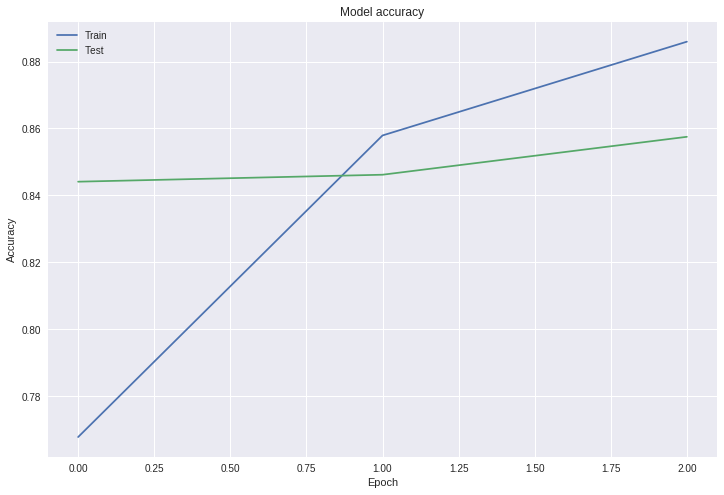

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12,8))
plt.plot(convergence_history.history['acc'])
plt.plot(convergence_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

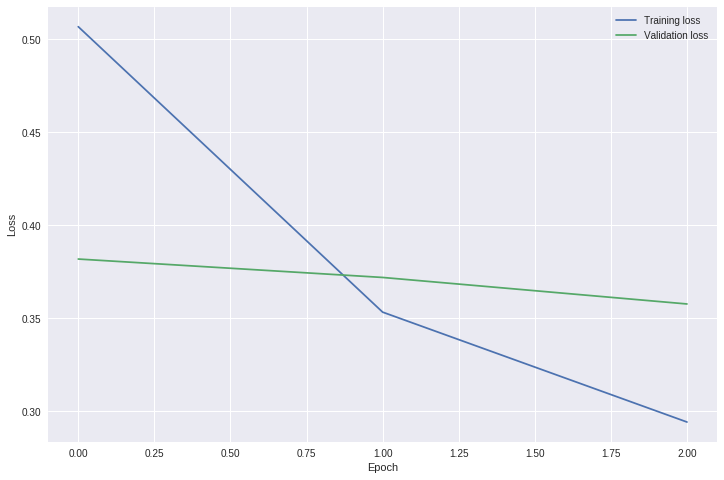

In [37]:
# Plot training & validation loss values
plt.figure(figsize=(12,8))
plt.plot(convergence_history.history['loss'], label="Training loss")
plt.plot(convergence_history.history['val_loss'], label="Validation loss")
plt.grid("on")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Step 7 - Evaluate the model

Use the test data to calculate the accuracy of the trained model.

In [38]:
scores = model.evaluate(x_test, y_test, verbose=1) 
print("Accuracy: %.2f%%" % (scores[1]*100))

25000/25000 [==============================] - 42s 2ms/step
Accuracy: 85.75%


# Step 8 - Use the trained model
Predict sentiment from the reviews:

"this movie was terrible and bad"
"i really liked the movie and had fun"

In [39]:
bad = "this movie was terrible and bad"
good = "i really liked the movie and had fun"
for review in [good,bad]:
    tmp = []
    for word in review.split(" "):
        tmp.append(word_to_id[word])
    tmp_padded = sequence.pad_sequences([tmp], maxlen=max_review_length) 
    print("%s. Sentiment: %s" % (review,model.predict(array([tmp_padded][0]))[0][0]))
#i really liked the movie and had fun. Sentiment: 0.715537
#this movie was terrible and bad. Sentiment: 0.0353295

i really liked the movie and had fun. Sentiment: 0.95149714
this movie was terrible and bad. Sentiment: 0.20104471


Now predict your own sentences with the trained model

In [0]:
#@title Define your review and predict the sentiment
badReview = "" #@param {type:"string"}
goodReview = "" #@param {type:"string"}
for review in [goodReview,badReview]:
    tmp = []
    for word in review.split(" "):
        tmp.append(word_to_id[word])
    tmp_padded = sequence.pad_sequences([tmp], maxlen=max_review_length) 
    print("%s. Sentiment: %s" % (review,model.predict(array([tmp_padded][0]))[0][0]))

# Step 9 - Complex (pre-trained) model

Since the training of a RNN model takes some time. A pre trained model is created. The model, where the weights are tuned, will be loaded into the network. This will save the traning time. 

check dit voorbeeld laden https://machinelearningmastery.com/save-load-keras-deep-learning-models/

https://www.liip.ch/en/blog/sentiment-detection-with-keras-word-embeddings-and-lstm-deep-learning-networks

In [12]:
from keras.models import load_model
model = load_model('best_weights.hdf5')

ImportError: ignored